<a href="https://colab.research.google.com/github/luckyetameta/MyGoCode/blob/main/Final_Project_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Students Performance in Exams**





**Importing labraries**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [3]:
exam_dt = pd.read_csv('/content/sample_data/exams.csv')

In [4]:
exam_dt.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [4]:
#data = exam.rename(columns={
   # 'gender': 'sex', 
   # 'race/ethnicity': 'race', 
   # 'parental level of education': 'level', 
  #  'lunch': 'lunch', 
  #  'test preparation course': 'test', 
   # 'math score': 'math', 
   # 'reading score': 'reading', 
  #  'writing score':'writing'
#})

**Getting dataset Information**

In [5]:
exam_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
exam_dt.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
#col_string = ['sex','race','level','lunch', 'test']
#for col in data[col_string]: 
    #print(f'Column = {col}\nElements = {data[col].unique()}\n')

In [8]:
#data.head(3)

**Visualising the dataset**




**Split by gender**

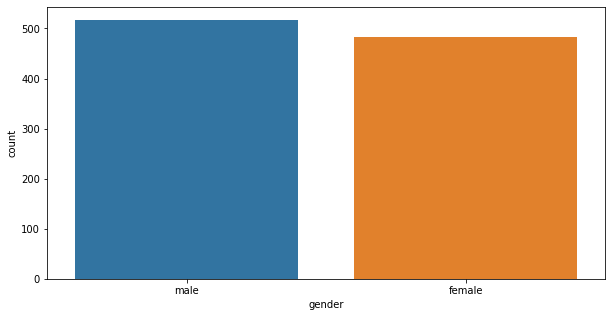

gender
female    483
male      517
Name: gender, dtype: int64


In [10]:
sns.countplot(x=exam_dt["gender"])
plt.show()

a = exam_dt.groupby(['gender'])['gender'].count()
print(a)

**Division by group race**

In [11]:
exam_dt.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

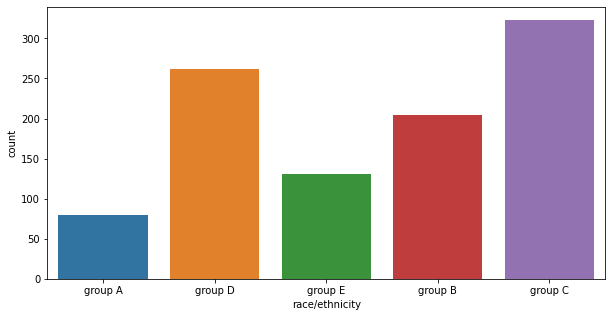

race/ethnicity
group A     79
group B    205
group C    323
group D    262
group E    131
Name: race/ethnicity, dtype: int64


In [12]:
sns.countplot(x=exam_dt["race/ethnicity"])
plt.show()
a = exam_dt.groupby(['race/ethnicity'])['race/ethnicity'].count()
print(a)

**Split by level of education**

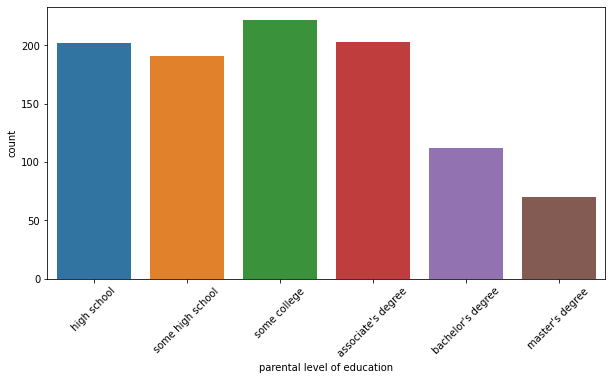

parental level of education
associate's degree    203
bachelor's degree     112
high school           202
master's degree        70
some college          222
some high school      191
Name: parental level of education, dtype: int64


In [14]:
sns.countplot(x=exam_dt["parental level of education"])
plt.xticks(rotation=45)
plt.show()

a = exam_dt.groupby(['parental level of education'])['parental level of education'].count()
print(a)

**Split by food division**

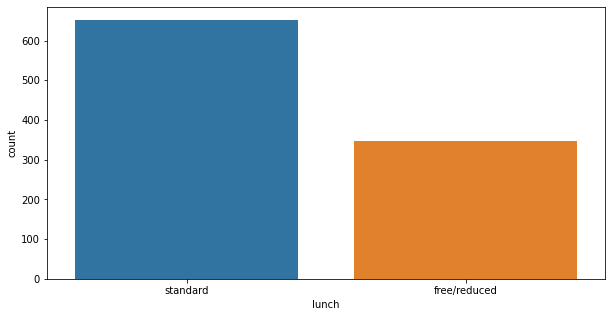

lunch
free/reduced    348
standard        652
Name: lunch, dtype: int64


In [15]:
sns.countplot(x=exam_dt["lunch"])
plt.show()

a = exam_dt.groupby(['lunch'])['lunch'].count()
print(a)

**Division by passing the test**

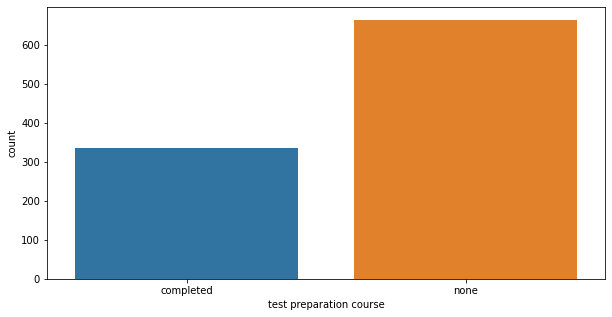

test preparation course
completed    335
none         665
Name: test preparation course, dtype: int64


In [16]:
sns.countplot(x=exam_dt["test preparation course"])
plt.show()

a = exam_dt.groupby(['test preparation course'])['test preparation course'].count()
print(a)

In [17]:
exam_dt.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [18]:
exam_dt['total'] = exam_dt['math score'] + exam_dt['reading score'] + exam_dt['writing score']
exam_dt.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219


In [21]:
exam_dt['total'].max(), exam_dt['total'].min()

(300, 65)

**Making a heat map of dependencies**

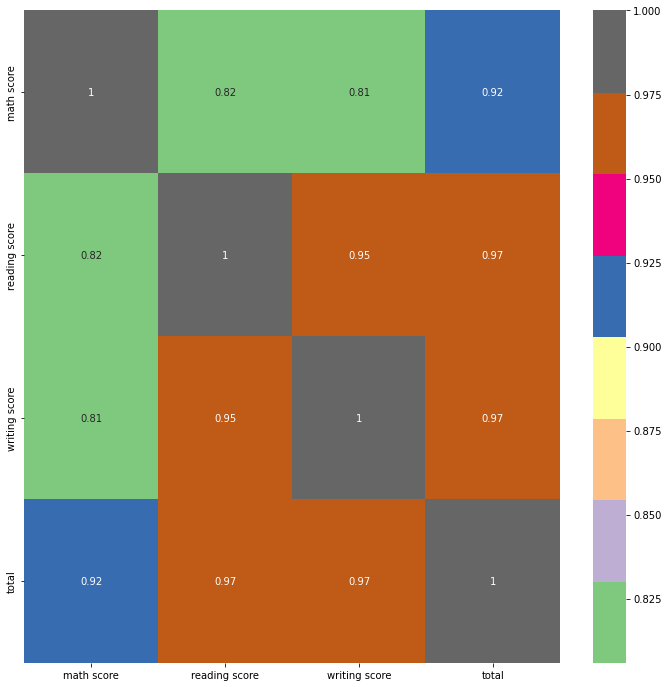

In [22]:
plt.rcParams["figure.figsize"] = [12, 12]
sns.heatmap(exam_dt.corr(), cmap="Accent", annot=True)

**Converting string to float**

In [25]:
exam_dt.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total'],
      dtype='object')

In [28]:
cat_data = exam_dt.iloc[:, :5]

for col in cat_data.columns:
  le = LabelEncoder()
  exam_dt[col] = le.fit_transform(exam_dt[col].values)

In [29]:
exam_dt.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,1,0,2,1,0,67,67,63,197
1,0,3,5,0,1,40,59,55,154
2,1,4,4,0,1,59,60,50,169
3,1,1,2,1,1,77,78,68,223
4,1,4,0,1,0,78,73,68,219


**Splitting the dataset into the Training set and Test set**

In [32]:
exam_dt.shape

(1000, 9)

In [31]:
x = exam_dt.iloc[:, :8].values
y = exam_dt.iloc[:, -1].values

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train with Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)

r2_score(y_test, y_pred)

1.0